## 2. Verifying the CLT & LLN

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

In [12]:
# Select the variable to demonstrate the CLT
x = df['alcohol'].dropna().values  # Remove NaN values if any

In [10]:
# Define sample sizes
sample_sizes = [10, 50, 200, 500]

# Define number of resamples per sample size
num_samples = 10000

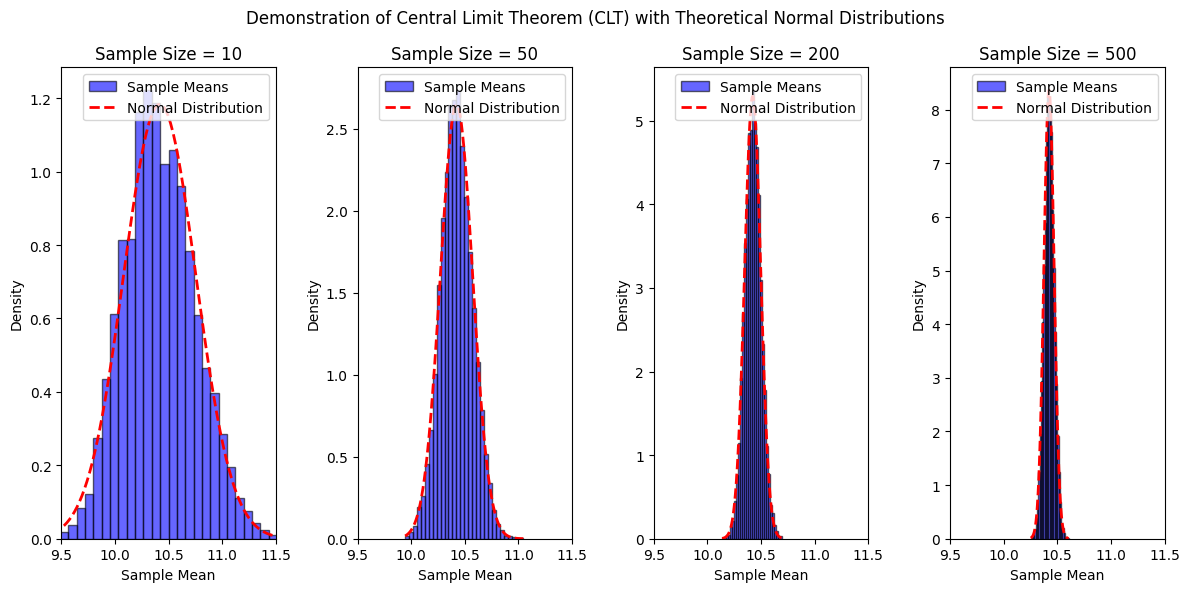

In [14]:
# Define sample sizes
sample_sizes = [10, 50, 200, 500]
num_samples = 10000  # Number of resamples per sample size

# Dictionary to store sample means
sample_means = {size: [] for size in sample_sizes}

# Generate sample means for each sample size
for size in sample_sizes:
    for _ in range(num_samples):
        sample = np.random.choice(x, size=size, replace=True)  # Bootstrap resampling
        sample_means[size].append(np.mean(sample))

# Compute population mean and standard deviation
pop_mean = np.mean(x)
pop_std = np.std(x, ddof=1)  # Using sample standard deviation formula

# Plot histograms of sample means with theoretical normal distribution
plt.figure(figsize=(12, 6))

for i, size in enumerate(sample_sizes):
    plt.subplot(1, len(sample_sizes), i + 1)
    
    # Plot histogram of sample means
    plt.hist(sample_means[size], bins=30, alpha=0.6, color="blue", edgecolor="black", density=True, label="Sample Means")
    
    # Compute theoretical normal distribution
    mean_sample_means = np.mean(sample_means[size])  # Mean of sample means
    std_sample_means = pop_std / np.sqrt(size)  # Standard Error of the Mean (SEM)
    
    # Generate x values for normal curve
    x_values = np.linspace(min(sample_means[size]), max(sample_means[size]), 100)
    y_values = stats.norm.pdf(x_values, mean_sample_means, std_sample_means)
    
    # Plot theoretical normal distribution
    plt.plot(x_values, y_values, color="red", linestyle="dashed", linewidth=2, label="Normal Distribution")

    # Set the same x-axis limits for all plots
    plt.xlim(9.5, 11.5)

    # Formatting
    plt.title(f"Sample Size = {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()

plt.suptitle("Demonstration of Central Limit Theorem (CLT) with Theoretical Normal Distributions")
plt.tight_layout()
plt.show()
